# Visualization of Geographic Data 

This topic came into picture when dealing with airbnb data set where geo locations(latitude, longitude) were also included in the raw data.

This also brought my mind into the days when I had to map satellight images into a geographic information system (GIS), I can still recall lots of computation needed where you need to take into consideration the angel from which the image was captured from the satellight and different kind of interpolations needed to adjust the image.

Anyway come back to the topic, I did some research and decided to try out below two methods:
 * Geographic data with [basemap](https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html) 
 * Goolge [map static api](https://developers.google.com/maps/documentation/maps-static/intro)

## 1. Airbnb Singapore Analysis

In [66]:
import pandas as pd

pd.options.display.max_rows = 5
pd.options.display.max_columns = 10
pd.options.display.width = 30
pd.options.display.float_format = lambda n : '%.2f' %n

In [67]:
def load_data():
    return pd.read_csv(
        '../Arch_Data/tomslee_airbnb_singapore/tomslee_airbnb_singapore_0116_2015-06-28.csv',
        delimiter = ',',
        na_values = ['?'])

In [68]:
df = load_data()

In [69]:
df.describe()

,room_id,host_id,borough,reviews,overall_satisfaction,...,bedrooms,price,minstay,latitude,longitude
count,2815.00,2815.00,0.00,2815.00,1705.00,...,2811.00,2815.00,2742.00,2815.00,2815.00
mean,4564987.19,15460453.33,nan,5.81,4.46,...,1.21,150.33,2.36,1.31,103.85
...,...,...,...,...,...,...,...,...,...,...,...
75%,6123358.00,24387477.00,nan,6.00,5.00,...,1.00,188.00,3.00,1.32,103.87
max,7043683.00,36904220.00,nan,163.00,5.00,...,6.00,5265.00,25.00,1.46,103.98


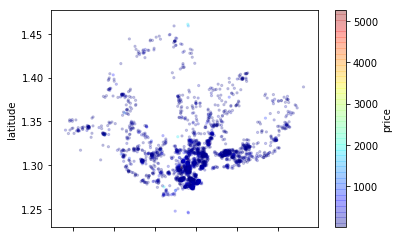

In [70]:
import matplotlib.pyplot as plt
df.plot.scatter(x = 'longitude', y = 'latitude', alpha = 0.2, c = 'price', 
                colormap = 'jet', s = 5)

From above, you can roughly tell yes this is Singapore, but can we improve that more?

## 2. Plot geographical data with basemap

Basemap is the matplot toolkit to process geographical data, the example below is to make use of the basemap countries plot as a base layer to visualize the airbnb price distributions over the Singapore.

In [71]:
from mpl_toolkits.basemap import Basemap

In [74]:
# determine range to print based on min, max lat and lon of the data
margin = 0.025# buffer to add to the range
lat_min = min(df['latitude']) - margin
lat_max = max(df['latitude']) + margin
lon_min = min(df['longitude']) - margin * 3
lon_max = max(df['longitude']) + margin * 3
lat_center = 0.5 * (lat_min + lat_max)
lon_center = 0.5 * (lon_min + lon_max)
print(lat_min, lat_max, lon_min, lon_max, lat_center, lon_center)

1.2204370000000002 1.485895 103.61574399999999 104.055738 1.353166 103.835741


In [75]:
import warnings
warnings.filterwarnings('ignore')

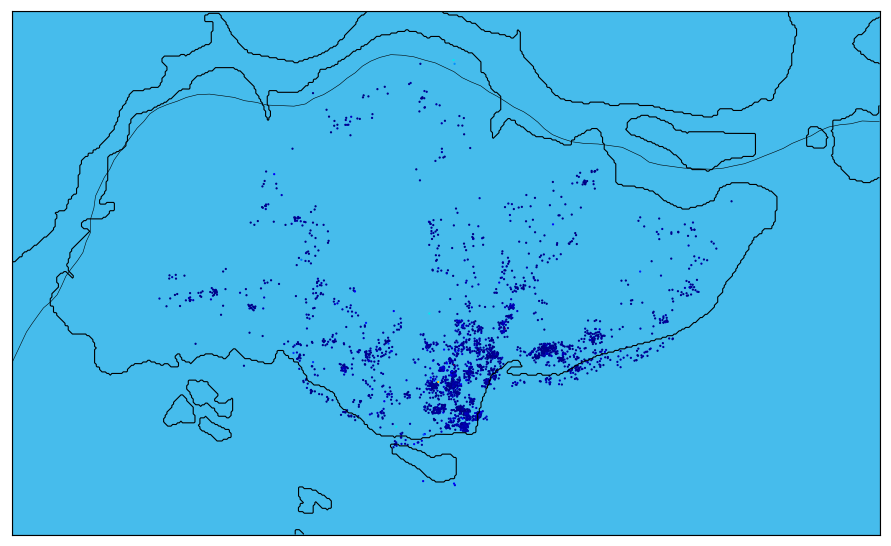

In [76]:
fig = plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'f',
            )
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#46bcec')
m.drawrivers()
#m.fillcontinents(color = 'white',lake_color='aqua')
x, y = m(df['longitude'].values, df['latitude'].values)
m.scatter(x,y,1,marker='o',c=df['price'], cmap='jet')

## 3. Plot geographical data with google map
The experiences of basemap is that it takes much longer than we would expect, also the country boundaries are a bit off(might be due to small area of Singapore). Anyway another approach which came into mind is the google map api.

https://maps.googleapis.com/maps/api/staticmap?center=1.353166,103.835741&markers=color:blue%7Clabel:S%7C1.3496345,103.808791&markers=color:green%7Clabel:G%7C1.098232,102.8888&zoom=11&size=600x400
